In [1]:
from tock import *

# Deterministic finite automata

A deterministic finite automaton (DFA) is a machine that can be in one state at a time, out of a finite set of states. It reads in symbols one at a time, and each symbol may cause it to change to a new state. When the machine has read the whole input string, it either accepts the string or rejects it.

Sipser and other textbooks represent DFAs, and all kinds of automata, using either tables or graphs. You can create automata either way and load them into Tock.

To create tables, you can use any spreadsheet software (Excel, OpenOffice, iWork, Google Drive) and export in CSV or Excel (`.xlsx`) format. Then read it into Tock using the `read_csv` or `read_excel` function.

In [2]:
m = read_csv("../examples/sipser-1-4.csv")

Graphs should be in Trivial Graph Format (TGF), which most graph-editing software ([yED], [Gephi]) can export in. Then a graph can be read into Tock using the `read_tgf` function.

[yED]: http://www.yworks.com/en/products/yfiles/yed/
[Gephi]: http://gephi.github.io

In [3]:
m = read_tgf("../examples/sipser-1-4.tgf")

Once a machine is loaded, we can test whether it is indeed a DFA:

In [4]:
m.is_finite(), m.is_deterministic()

(True, True)

Regardless of how it was created and loaded, it can be viewed as a table:

In [5]:
to_table(m)

,0,1
>q1,q1,q2
@q2,q3,q2
q3,q2,q2


This machine has three states, listed in the first column: `q1`, `q2`, and `q3`. The `>` means that `q1` is the start state (the state the machine starts in), and the `@` means that `q2` is a final state (meaning that when the machine has read all of the input, it accepts the input iff it is in a final state). These symbols are not part of the state name.

The first row lists all possible input symbols (here, `0` and `1`), and the interior cells indicate what the new state should be after reading a symbol. For example, if the machine is in state `q1` and reads a `1`, then it changes to state `q2`.

It's more convenient to visualize the automaton's operation using a state transition diagram:

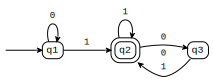

In [6]:
to_graph(m)

Now let's run the automaton on a string:

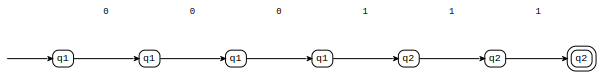

In [7]:
run(m, "0 0 0 1 1 1")

The run is displayed as another graph (for reasons that will be more clear when we get to nondeterminism). Each node says what state the machine is at a time step, and on the right is the input string, with the next symbol marked with square brackets. The run ends with a double node, indicating that at the end of the input string, the machine was in a final state, so it accepted the string.

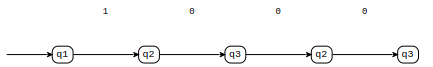

In [8]:
run(m, "1 0 0 0")

This time, the fact that the run doesn't end with a double node means that the string was rejected.